# Linear Regression from Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
data = pd.read_csv('Dataset/Linear Regression.csv')

In [3]:
data = data[0:298]
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


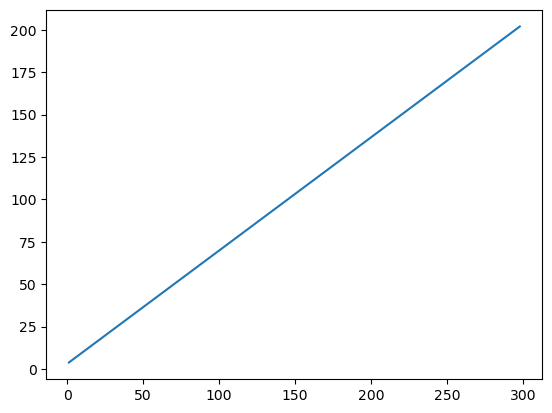

In [4]:
plt.plot(data['X'],data['Y'])

<AxesSubplot:xlabel='Y', ylabel='Density'>

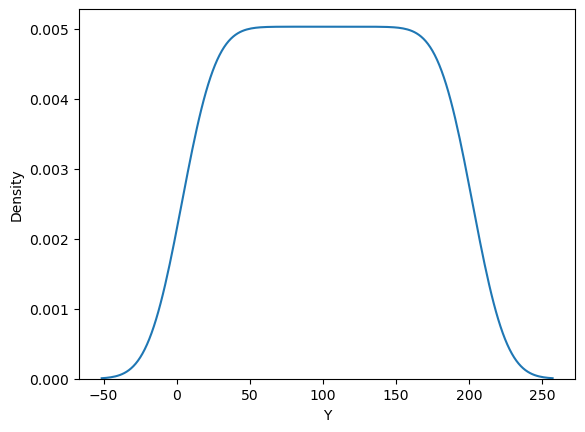

In [5]:
sns.kdeplot(data['Y'])

In [6]:
def linear_gradient(x:float, y:float, theta:list)->list:
    slope, intercept = theta
    
    predict = (slope*x) + intercept
    
    error = predict - y

    squared_error = error**2
    
    grad = [2 * error * x, 2 * error]
    
    return grad;


def gradient_step(theta:list,gradient_vector:list,step_size:float):
    
    assert len(theta) ==  len(gradient_vector)
    
    step = [step_size*y for y in gradient_vector]
    
    return [x+y for x, y in zip(step, theta)];


In [7]:
# inputs = [(x, 20*x+5) for x in range(-50,50)]
inputs = data.values.tolist()
theta = [random.uniform(-1,1,), random.uniform(-1,1)]
epochs = 20000
learning_rate = 0.00001
for epoch in range(epochs):
    grad =np.mean([linear_gradient(x, y, theta) for x, y in inputs], axis=0)
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [0.6622385004779845, 0.9029582839242106]
1 [0.6718079028434136, 0.9030179094200049]
2 [0.6756832368271564, 0.9030489212102167]
3 [0.6772526156119796, 0.9030683451315813]
4 [0.6778881402485203, 0.9030830762219009]
5 [0.6781454773251129, 0.9030959067989354]
6 [0.6782496579043367, 0.9031079676814994]
7 [0.6782918139350776, 0.9031197168229138]
8 [0.6783088515760346, 0.9031313396828134]
9 [0.6783157168978947, 0.9031429113677094]
10 [0.678318462685257, 0.9031544622938593]
11 [0.6783195401644116, 0.9031660047790865]
12 [0.6783199420206637, 0.9031775438118014]
13 [0.6783200702667194, 0.9031890814121853]
14 [0.6783200877076643, 0.9032006183983616]
15 [0.678320060275484, 0.9032121551016498]
16 [0.6783200146709824, 0.9032236916562261]
17 [0.6783199617073171, 0.9032352281164288]
18 [0.6783199057635463, 0.9032467645042636]
19 [0.6783198486130789, 0.9032583008286424]
20 [0.6783197909741012, 0.9032698370931748]
21 [0.6783197331374607, 0.9032813732993223]
22 [0.6783196752209433, 0.9032929094476774]


In [8]:
theta

[0.6772172757614054, 1.1226685751181744]

In [9]:
y_hat = [theta[0]*x + theta[1] for x, _ in inputs]

In [10]:
x = data['X'].tolist()
y = data['Y'].tolist()

Mean Square loss =  1.0964935320343532


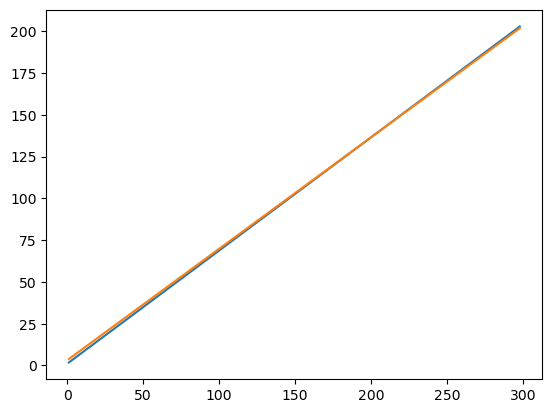

In [11]:
plt.plot(x, y_hat)
plt.plot(x, y)
print('Mean Square loss = ',np.mean(np.subtract(np.array(y_hat) , np.array(y))**2))

# Logistic Regression

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
data = pd.read_csv('Dataset/Logistic_regression.csv')

In [14]:
data.head()

,x1,x2,t
0,6.085486,43.226207,0.0
1,4.147929,-117.512434,0.0
2,6.459521,97.007536,0.0
3,2.350155,-0.554253,0.0
4,0.992671,61.111770,0.0


In [15]:
data.isnull().sum()

x1    0
x2    0
t     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6311 non-null   float64
 1   x2      6311 non-null   float64
 2   t       6311 non-null   float64
dtypes: float64(3)
memory usage: 148.0 KB


The skewness in the data is 0.018739563047825217 which is within the range
3.477976702157082


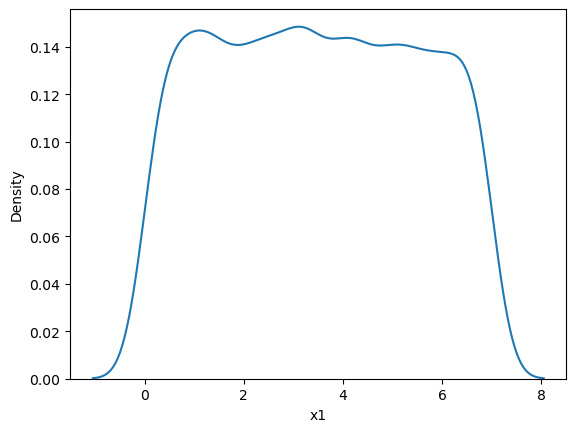

In [17]:
sns.kdeplot(data['x1'])
print('The skewness in the data is',data['x1'].skew(),'which is within the range')
print(data['x1'].mean())

In [18]:
data.describe()

,x1,x2,t
count,6311.000000,6311.000000,6311.000000
mean,3.477977,2.811144,0.683093
std,2.016079,84.502360,0.465308
min,0.002324,-149.995478,0.000000
25%,1.723568,-69.039539,0.000000
50%,3.436070,4.819181,1.000000
75%,5.209477,76.604580,1.000000
max,6.999034,153.720038,1.000000


In [19]:
data['extra'] = 1

In [20]:
data.head()

,x1,x2,t,extra
0,6.085486,43.226207,0.0,1
1,4.147929,-117.512434,0.0,1
2,6.459521,97.007536,0.0,1
3,2.350155,-0.554253,0.0,1
4,0.992671,61.111770,0.0,1


In [21]:
#Writing the fucntion for the gradient
def gradient(theta:list, x:list, y:float):
    
    z = np.sum(np.multiply(theta, x))  # the powe of the exponential
    
    prediction = 1 / (1 + ((np.e)**(-z)))
    
    error = prediction - y
    
    grad = 2*error*x[0:2]
    
    grad = np.append(grad, 2*error)
    
    return grad


def gradient_step(theta:list, gradient_vec:list, step_size:float):
    
    step = step_size*gradient_vec
    
    theta = theta + step
    
    return theta

In [22]:
x_vec = np.array(data[['x1','x2','extra']].values)
y_vec = np.array(data['t'].values)

theta = np.random.uniform(-1,1, len(x_vec[0]))
lr = 0.00001
epochs = 5000

# Trainig out model
for epoch in range(epochs):
    grad = np.mean([gradient(theta,x, y) for x, y in zip(x_vec, y_vec)], axis=0)

    theta = gradient_step(theta, grad, -lr)
    
    print('Epoch : ',epoch, '  theta : ', theta)


Epoch :  0   theta :  [ 0.89718424 -0.07848614 -0.7259595 ]
Epoch :  1   theta :  [ 0.89718725 -0.07791311 -0.72595763]
Epoch :  2   theta :  [ 0.89719017 -0.07734117 -0.72595578]
Epoch :  3   theta :  [ 0.897193   -0.07677035 -0.72595395]
Epoch :  4   theta :  [ 0.89719575 -0.07620067 -0.72595214]
Epoch :  5   theta :  [ 0.8971984  -0.07563216 -0.72595034]
Epoch :  6   theta :  [ 0.89720097 -0.07506484 -0.72594856]
Epoch :  7   theta :  [ 0.89720344 -0.07449872 -0.7259468 ]
Epoch :  8   theta :  [ 0.89720583 -0.07393384 -0.72594505]
Epoch :  9   theta :  [ 0.89720812 -0.07337023 -0.72594332]
Epoch :  10   theta :  [ 0.89721031 -0.07280789 -0.72594162]
Epoch :  11   theta :  [ 0.89721241 -0.07224687 -0.72593993]
Epoch :  12   theta :  [ 0.89721441 -0.07168719 -0.72593826]
Epoch :  13   theta :  [ 0.89721631 -0.07112887 -0.72593661]
Epoch :  14   theta :  [ 0.89721811 -0.07057193 -0.72593497]
Epoch :  15   theta :  [ 0.89721982 -0.07001642 -0.72593336]
Epoch :  16   theta :  [ 0.8972214

In [23]:
prediction_array = []
for i in range(len(x_vec)):
    a = theta*[x_vec[i]]
    z = a.sum()
    prediction = 1 / (1 + ((np.e)**(-z)))
    prediction_array.append(prediction)
    
prediction_array = np.array(prediction_array)

In [24]:
cost_array = (y_vec*np.log(prediction_array ))+ ((1 - y_vec)*np.log(1 - prediction_array))
cost = -cost_array.mean()
print('The total cost of model : ', cost)

The total cost of model :  0.9110971277096335


# Support Vector Machine

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Working with Perfectly Linear Dataset

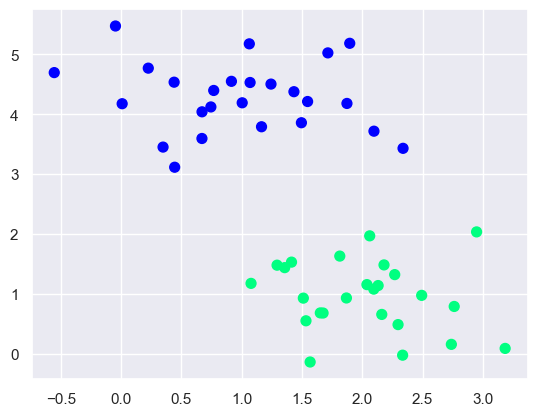

In [26]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(x,y)

SVC(C=1, kernel='linear')

In [28]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

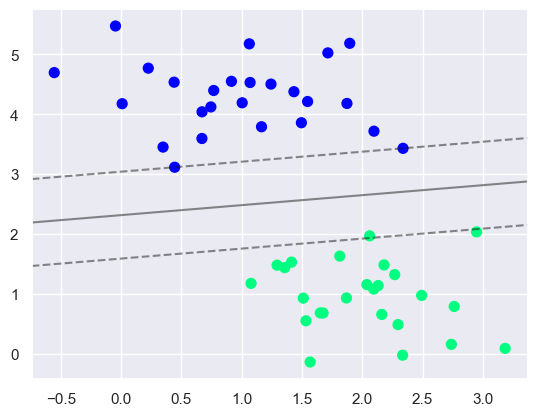

In [29]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf);

### The importance of Support Vectors

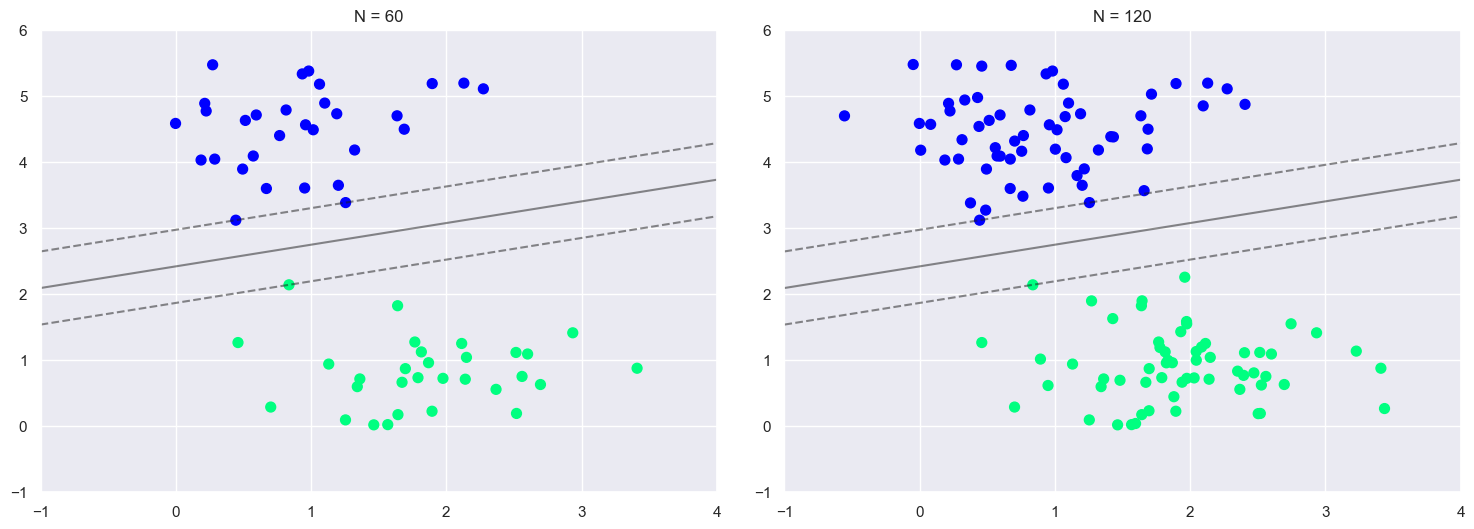

In [30]:
from sklearn.svm import SVC
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Working with Almost Linearly Separable Dataset

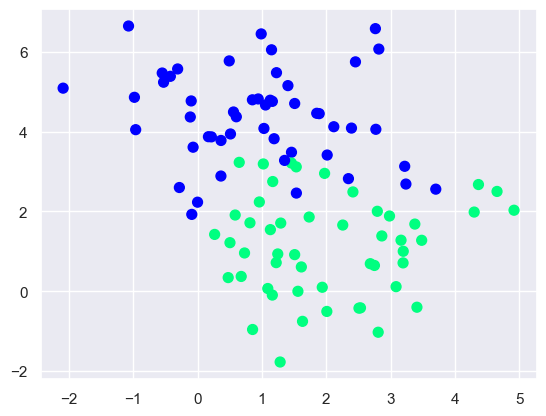

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

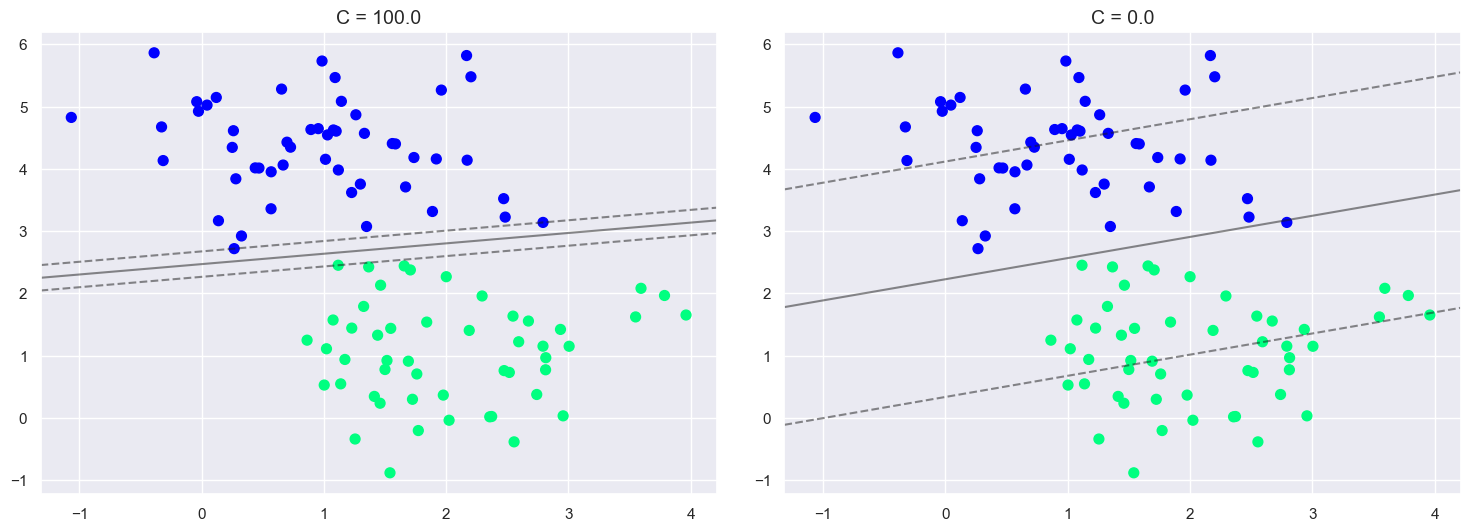

In [32]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# K-Nearest Neighbors Algorithm 
This algorithm is a lazzy algorithm

import seaborn as sns
import math
import numpy as np
from typing import List
from collections import Counter
import matplotlib.pyplot as plt

In [33]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


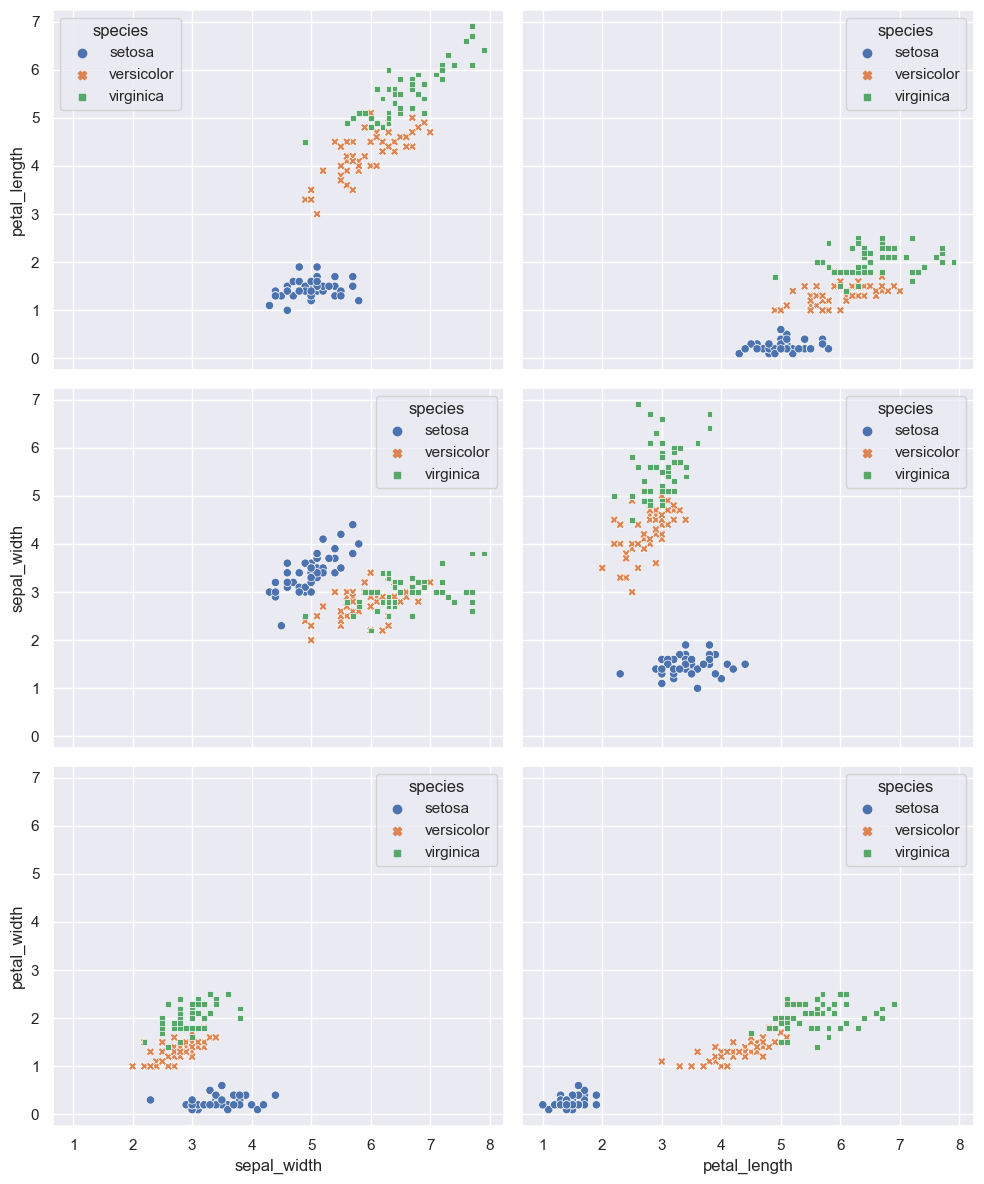

In [34]:
# Now ploting the scatter plot for the predicted species
fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True, sharey=True)
sns.scatterplot(data = data, x = data['sepal_length'],y = data['petal_length'],style=data['species'],hue = data['species'], ax=axes[0,0])
sns.scatterplot(data = data, x = data['sepal_length'],y = data['petal_width'],style=data['species'],hue = data['species'],ax=axes[0,1])
sns.scatterplot(data = data, x = data['sepal_length'],y = data['sepal_width'],style=data['species'],hue = data['species'],ax=axes[1,0])
sns.scatterplot(data = data, x = data['sepal_width'],y = data['petal_length'],style=data['species'],hue = data['species'],ax=axes[1,1])
sns.scatterplot(data = data, x = data['sepal_width'],y = data['petal_width'],style=data['species'],hue = data['species'],ax=axes[2,0])
sns.scatterplot(data = data, x = data['petal_length'],y = data['petal_width'],style=data['species'],hue = data['species'],ax=axes[2,1])

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
# lets take  petal_length and petal_width as the feature
def dist(cord1:list, cord2:list)->float:
    cord = np.subtract(cord1, cord2)
    distance = 0;
    for i in cord:
        distance += i**2
    return math.sqrt(distance)

def calculate_dist_array(cord:list, data:list)->list:
    dist_array = []
    for cordinate in data:
        distance = dist(cord, cordinate[0:len(cord)])
        dist_array.append([distance, cordinate[2:3][0]])
    dist_array = sorted(dist_array, key=lambda x: x[0])
    return dist_array

def majority_vote(labels: list[str])->str:
    # We are assuming the labels are ordered from nearest to farthest
    vote_count = Counter(labels)
    winner, winner_count = vote_count.most_common(1)[0]
    num_winners = len([count for count in vote_count.values() 
                       if count==winner_count])
    if num_winners==1:
        return winner
    else:
        majority_vote(labels[0 : -1]) # now try again without including the farthest
    
def predict_class(cord:list, data:list, k_value:int=7)->str:
    array = calculate_dist_array(cord, cordinates)[1:k_value+1]
    col = [row[1] for row in array]
    result = majority_vote(col)
    return result

In [36]:
cordinates = data[['petal_length','petal_width','species']].values

In [37]:
predict = [predict_class(cordinates[i][0:2], cordinates) for i in range(len(cordinates))]

NameError: name 'math' is not defined

In [ ]:
data['predicted'] = predict

In [ ]:
# Now ploting the scatter plot for the predicted species
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

sns.scatterplot(data=data, x=data['petal_length'], y=data['petal_width'], style=data['predicted'], hue = data['predicted'], ax=axes[0])
axes[0].set_title('Predicted Species')

sns.scatterplot(data=data, x=data['petal_length'], y=data['petal_width'], style = data['species'], hue = data['species'], ax=axes[1])
axes[1].set_title('Actual Species')

# Show the plot
plt.tight_layout()
plt.show()

# Intution for Naive bayse using Play_Tennis data set

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('Dataset/PlayTennis.csv')

In [40]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [41]:
# calculation the probabilities of yes and no
data['play'].value_counts()

yes    9
no     5
Name: play, dtype: int64

In [42]:
py = 9/14
pno = 5/14

In [43]:
pd.crosstab(index = data['outlook'], columns=data['play'])

play,no,yes
outlook,,
overcast,0,4
rainy,2,3
sunny,3,2


In [44]:
poy = 4/9
pry = 3/9
psy = 2/9

pon = 0
prn = 2/5
psn = 3/5

In [45]:
pd.crosstab(data['temp'], data['play'])

play,no,yes
temp,,
cool,1,3
hot,2,2
mild,2,4


In [46]:
pcooly = 3/9
photy = 2/9
pmildy = 4/9

pcooln = 1/5
photn = 2/5
pmildn = 2/5

In [47]:
pd.crosstab(data['humidity'], data['play'])

play,no,yes
humidity,,
high,4,3
normal,1,6


In [48]:
phighy = 3/9
pnormaly = 6/9

phighn = 4/5
pnormaln = 1/5

In [49]:
pd.crosstab(data['windy'], data['play'])

play,no,yes
windy,,
False,2,6
True,3,3


In [50]:
pFy = 6/9
pTy = 3/9

pFn = 2/5
pTn = 3/5

In [51]:
# we have to calculate the paly result if outlook = sunny, temp = hot, humidity=high, windy = Falase
p_yes = psy * photy * phighy * pTy * py
p_no = psn * photn * phighn * pTn * pno

In [52]:
if(p_yes>p_no):
    print("Game will be played")
else:
    print("Game will not be played")

Game will not be played


# Spam or not Spam Message filter from Emails from scratch

In [53]:
from typing import Set, NamedTuple, List, Tuple, Dict, Iterable
import re 
import math
from collections import defaultdict

def tokenize(text:str)->Set[str]:
    text = text.lower()                         # converting to lowercase letter
    all_words = re.findall('[a-z0-9]+',text)    # extracting the words
    return set(all_words);                      # removign the duplicates

# Defining the datatpe for out traning data for easy training
class Message(NamedTuple):
    text : str
    is_spam : bool

class NaiveBayesClassifier:
    def __init__(self, k:float=0.5)->None:
        self.k = k #This is the smoothening factor
        
        self.tokens:Set[str] = set()
        self.token_spam_counts:Dict[str, int] = defaultdict(int)
        self.token_ham_counts:Dict[str, int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0   #This is the total number of spam and ham message
        
    def train(self, messages:Iterable[Message])->None:  # This is a function of training to create the lookup table
        for message in messages:
            # Increment message count
            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1
            
            # Increment word count
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] += 1
                else:
                    self.token_ham_counts[token] += 1
        print("The model has been trained")
                    
    def _probabilities(self, token:str)->Tuple[float, float]:
        # return's the P(token|spam) and P(token|ham)
        spam = self.token_spam_counts[token] # total number of the times the word occured given the message is spam
        ham = self.token_ham_counts[token]   # total number of the times the word occured given the message is ham
        
        p_token_spam = (spam + self.k)/(self.spam_messages+(2*self.k))
        p_token_ham = (ham + self.k)/(self.ham_messages+(2*self.k))
        
        return p_token_spam, p_token_ham
    
    def predict(self, text:str)->float:
        text_tokens = tokenize(text)
        log_prob_if_spam = log_prob_if_ham = 0
        
        for token in self.tokens:
            prob_if_spam, prob_if_ham = self._probabilities(token)
            
            # if *token* appears in message,
            # add the log probability of seeing it 
            if token in text_tokens:
                log_prob_if_spam += math.log(prob_if_spam)
                log_prob_if_ham += math.log(prob_if_ham)
                
            # otherwise add the log probability of not seeing it
            # which is log(1 - probability of seeing it)
            else:
                log_prob_if_spam += math.log(1  - prob_if_spam)
                log_prob_if_ham += math.log(1 - prob_if_ham)
                
            prob_if_spam = math.exp(log_prob_if_spam)
            prob_if_ham = math.exp(log_prob_if_ham)
            
        return prob_if_spam/(prob_if_spam + prob_if_ham)

In [54]:
"""This part of the code is only to download the dataset from the website"""


from io import BytesIO  # So we can treat bytes as a file 
import requests         # To download the files, which   
import tarfile          # are in /tar .bz format

base_url = "https://spamassassin.apache.org/old/publiccorpus"

Files = ["20021010_easy_ham.tar.bz2", 
         "20021010_hard_ham.tar.bz2",
         "20021010_spam.tar.bz2"]

output_dir = "D:\ML_algorithms\Dataset\Spam_Ham"

for filename in Files:
    # use requests to get the file contents at each URL
    content = requests.get(f"{base_url}/{filename}").content
    
    # use the in_memory bytes so we can use them as a file
    fin = BytesIO(content)
    
    # and extrach all the files to the specified output directory
    with tarfile.open(fileobj=fin, mode='r:bz2') as tf:
        tf.extractall(output_dir)

In [55]:
# To keep the traning simple we will use the subject line of the email only
import glob, re
path = "D:\ML_algorithms\Dataset\Spam_Ham\*\*"

data:List[Message] = []
# glob.glob returns every filename that matches the wildcarded path

for filename in glob.glob(path):
    is_spam = 'ham' not in filename
    
    # There are some garbage characters in the emails; the errors='ignore'
    # skips them instead of raising an exception
    with open(filename, errors='ignore') as email_file:
        for line in email_file:
            if line.startswith("Subject:"):
                subject = line.lstrip("Subject: ")
                data.append(Message(subject, is_spam))
                break #done with this file

In [56]:
# Now lets split the data into training and testing data 

# custom function to split the data into training and testing
def split_data(data:List[Message], train_ratio)->Tuple[List[Message], List[Message]]:
    train_size = int(len(data)*train_ratio)
    train_data = random.sample(data, train_size)
    test_data = [item for item in data if item not in train_data]
    return train_data, test_data

train_data, test_data = split_data(data, train_ratio=0.75)

In [57]:
# Now lets train our naive bayes classifier model

model = NaiveBayesClassifier(k=0.5)

model.train(train_data)

The model has been trained


In [58]:
# Now let's predict something and see how out model perfoems
from collections import Counter

predictions = [(message,model.predict(message.text)) for message in test_data]

confusion_matrix = Counter((message.is_spam, spam_probability>0.5) 
                          for message, spam_probability  in predictions)
print(confusion_matrix)

Counter({(False, False): 373, (True, True): 69, (True, False): 26, (False, True): 22})


# Classification Decision Trees from Scratch

In [59]:
# For more information or Theory read from the book data science from scratch
from typing import List, Dict, Tuple, NamedTuple, Union, Any, Optional
from collections import Counter
import math
import pandas as pd

def entropy(data:List[str])->float:
    entropy = 0
    counter = Counter(data)
    length = len(data)
    for i in counter:
        freq = counter[i]/length
        entropy += (-freq*math.log2(freq))             
    return entropy

def info_gain(parent:List[str], child:List[str])-> float:
    parent_entropy = entropy(parent)  # calculatng the entropy of parent
    weighted_child_entropy = 0 # Initialising the weighted entropy of child
    child_dict:Dict[str, List[str]] = {key : [] for key in child} #Defining an dict with empty list
    
    total_length = len(parent) # claculating the length of then parent to calculate the weight
    
    for i in range(len(child)):
        child_dict[child[i]].append(parent[i])
        
    for _, value in child_dict.items():
        weight = len(value)/total_length
        weighted_child_entropy += weight * entropy(value) 
        
    return parent_entropy - weighted_child_entropy # calculating the Information gain

def split_node_basis(parent:str, df:pd.DataFrame)->str:
    my_dict:Dict[str,float] = {}
    for i in df.columns:
        if i!=parent:
            my_dict[i] = info_gain(df[parent].values, df[i].values)
    return max(my_dict, key=my_dict.get)


def partition_by(parent:str, df: pd.DataFrame)->Dict[str, pd.DataFrame]:
    Dict = {}
    best_attribute = split_node_basis(parent, df)
    a = list(set(df[best_attribute].values))
    for i in a:
        Dict[i] = df[(df[best_attribute]==i)]
    return Dict
    
    
# Now Creating a Decision tree ie. Leaf and Split

class Leaf(NamedTuple):
    value : Any
    
class Split(NamedTuple):
    attribute : str
    subtree : dict
    default_value : Any = None
    
Decision_Tree = Union[Split, Leaf]

#To clssify the input
def classify(tree : Decision_Tree, inputs: Any)->Any:
    # clssify the input using the given decision tree
    
    # if this is a leaf node, return its vlaue
    if isinstance(tree, Leaf):
        return tree.value
    
    # otherwise this tree consists of an attribute to split on
    # and a dictionary whose keys are values of that attribute 
    # and whose values are subtrees to consider next
    subtree_key =  getattr(inputs, tree.attribute)
    
    if subtree_key not in tree.subtree: # if no subtree for the key
        return tree.default_value        # return the default value.
    
    subtree = tree.subtree[subtree_key]
    return classify(subtree, inputs)
    
def build_tree_id3(inputs : pd.DataFrame, split_attributes : List['str'], target_attribute : str):
    # count the target lables
    lable_count = Counter(getattr(inputs, target_attribute))
    
    most_common_lable = lable_count.most_common(1)[0][0]
    
    # if there is a unique lable, predict it
    if len(lable_count)==1:
        return Leaf(most_common_lable)
    
    # if no split attributes left , return the majority lable
    if not split_attributes:
        return Leaf(most_common_lable)
    
    best_attribute = split_node_basis(target_attribute, inputs)
    
    partitions = partition_by(target_attribute,inputs)
    new_attribute = [a for a in split_attributes if a!=best_attribute]
    
    # Recursively build the subtrees
    subtrees = {attribute_value : build_tree_id3(subset, 
                                                 new_attribute,
                                                 target_attribute)
                for attribute_value, subset in partitions.items()}
    
    return Split(best_attribute, subtrees, default_value=most_common_lable) 

In [60]:
data = pd.read_csv('Dataset/PlayTennis.csv')

In [61]:
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [62]:
tree = build_tree_id3(data, ['outlook', 'temp', 'humidity', 'windy'], 'play')

In [63]:
tree

Split(attribute='outlook', subtree={'rainy': Split(attribute='windy', subtree={False: Leaf(value='yes'), True: Leaf(value='no')}, default_value='yes'), 'overcast': Leaf(value='yes'), 'sunny': Split(attribute='humidity', subtree={'high': Leaf(value='no'), 'normal': Leaf(value='yes')}, default_value='no')}, default_value='yes')

In [64]:
"""
   so to predict the output first we have to give input features like outlook, temp,
   humidity, windy to get the output as if we are going to play the match or not
"""

class Conditions(NamedTuple):
    outlook : str
    temp : str
    humidity : str
    windy : bool
    play : Optional[bool] = None

In [65]:
# predicting Output
classify(tree, Conditions('sunny','mild','normal',True))

'yes'